1. Знайдіть функцію Лагранжа системи, для якої функція Гамільтона має вигляд

$$H = x^2 p_x^2 - F x - \alpha x^2$$

Напишіть рівняння Ейлера-Лагранжа і Гамільтона, впевніться в їх еквівалентності.

In [1]:
from IPython.display import display, Math, Latex

def disp(ex):
    display(Math(latex(ex)))

def displ(tex):
    display(Math(tex))

In [2]:
# Объявление переменных и функций

t = var("t")

V = var("v")
v = function("v")(t)

X = var("x")
x = function("x")(t)

P = var("p")
p = function("p")(t)

alpha = var("alpha")
F = var("F")

In [3]:
# Объявление переменных - обобщенные импульсы

p_x = var("p_x")

In [4]:
H = x^2 * p_x^2 - F * x - alpha * x^2
displ("H = " + latex(H))

<IPython.core.display.Math object>

Записываем уравнения Гамильтона

$\dot{p}_i = - \frac{\partial H}{\partial x_i}$

$\dot{x}_i = \frac{\partial H}{\partial p_i}$

In [5]:
dot_px = - H.subs(x == X).diff(X)
dot_x = H.diff(p_x).subs(x == X)

In [6]:
displ("\\dot{p}_x =" + latex(dot_px))

<IPython.core.display.Math object>

In [7]:
displ("\\dot{x} =" + latex(dot_x))

<IPython.core.display.Math object>

In [8]:
eq_dot_x = V == dot_x
disp(eq_dot_x)

<IPython.core.display.Math object>

In [9]:
px_sol = solve(eq_dot_x, p_x)
disp(px_sol)

<IPython.core.display.Math object>

Выразим энергию через Гамильтониан

In [10]:
E = H.subs(px_sol).subs(V == v)
disp(H)
disp(E)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Выразим Лагранжиан через энергию 

$L = \Sigma_{i}^{} \frac {\partial L}{\partial \dot{q}_i} \frac {q_i}{dt} - E$

In [11]:
L = (px_sol[0].rhs() * v - E).subs(V == v)
disp (L)

<IPython.core.display.Math object>

# Интегрирование уравнений Гамильтона

In [12]:
# полученные уравнения Гамильтона обьединяем в систему из 2 уравнений
des = [dot_px, dot_x]
disp(des)

<IPython.core.display.Math object>

In [13]:
values1 = [F == 0.01, alpha == 0.01]
values1

[F == 0.0100000000000000, alpha == 0.0100000000000000]

In [14]:
# в которой делаем подстановку численных значений
f1 = [de_i.subs(values1) for de_i in des]
disp(f1)

<IPython.core.display.Math object>

In [15]:
# Solve numerically a system of first-order ordinary differential equations
# using odeint from scipy.integrate module.

# des – right hand sides of the system
# ics – initial conditions
# times – a sequence of time points in which the solution must be found
# dvars – dependent variables. ATTENTION: the order must be the same as in des, that means: d(dvars[i])/dt=des[i]
# ivar – independent variable, optional.

times1 = srange(0, 0.425, 0.000001)

p0 = 0
x0 = 0.01

sol1 = desolve_odeint(des=f1, ics=[p0,x0], times=times1, dvars=[p_x, X], ivar=t)

# Построение фазовых диаграмм ($p(x)$)

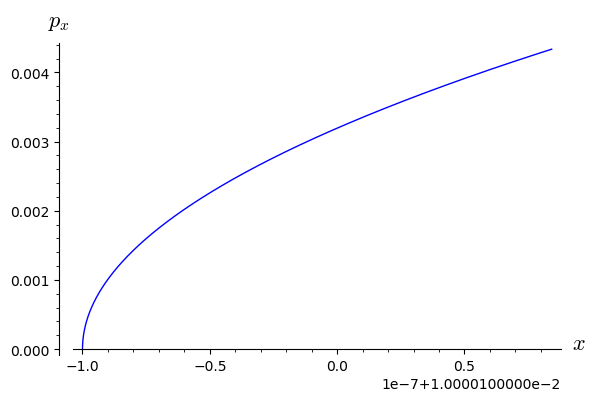

In [16]:
p = line(zip(sol1[:,1],sol1[:,0]), axes_labels=['$x$','$p_x$',])
p.show()

# Построение зависимости обобщённых координат и импульсов от времени

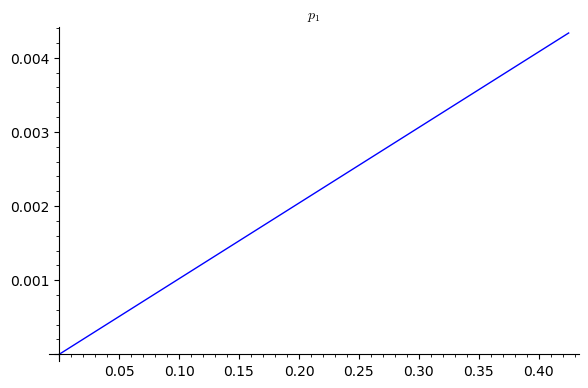

In [17]:
p = line(zip(times1,sol1[:,0]))
p.show(title="$p_1$")

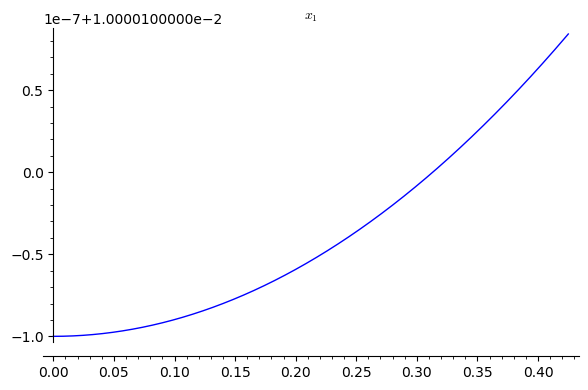

In [18]:
p = line(zip(times1,sol1[:,1]))
p.show(title="$x_1$")